<a href="https://colab.research.google.com/github/toheedulhaq082/BTC_Price_Prediction_webapp/blob/main/Price_Prediction_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/BTC-USD.csv", index_col = False)

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-15,7989.374512,8216.423828,7899.106934,8205.167969,8205.167969,28344112920
1,2019-05-16,8194.500977,8320.824219,7729.608398,7884.909180,7884.909180,33167197581
2,2019-05-17,7886.925781,7929.145508,7038.124512,7343.895508,7343.895508,30066644905
3,2019-05-18,7341.664551,7447.271973,7251.504395,7271.208008,7271.208008,21354286562
4,2019-05-19,7267.962891,8261.941406,7267.962891,8197.689453,8197.689453,25902422040
5,2019-05-20,8196.923828,8200.967773,7678.781738,7978.309082,7978.309082,23843404340
6,2019-05-21,7977.969238,8062.167969,7843.339844,7963.327637,7963.327637,25127245056
7,2019-05-22,7956.291992,7997.612305,7615.987305,7680.066406,7680.066406,24719473175
8,2019-05-23,7677.269043,7943.791504,7533.196777,7881.846680,7881.846680,24457107820
9,2019-05-24,7881.695313,8140.719727,7824.448730,7987.371582,7987.371582,25919126991


In [ ]:
new_df = df.reset_index()['Close']

In [ ]:
new_df.head()

0    8205.167969
1    7884.909180
2    7343.895508
3    7271.208008
4    8197.689453
Name: Close, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

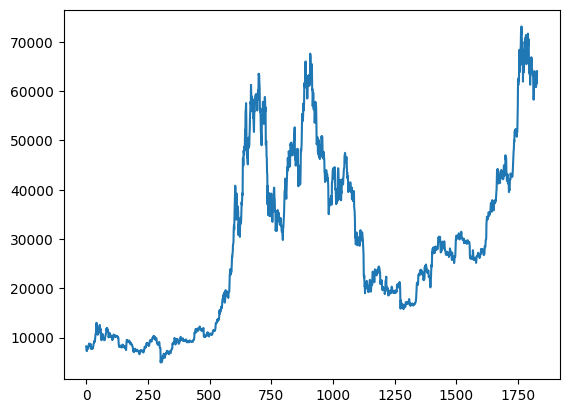

In [ ]:
plt.plot(new_df)

In [ ]:
new_df.shape

(1828,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
new_df =scaler.fit_transform(np.array(new_df).reshape(-1,1))

In [ ]:
new_df

array([[0.0474857 ],
       [0.04278381],
       [0.03484089],
       ...,
       [0.85051174],
       [0.83071132],
       [0.8668796 ]])

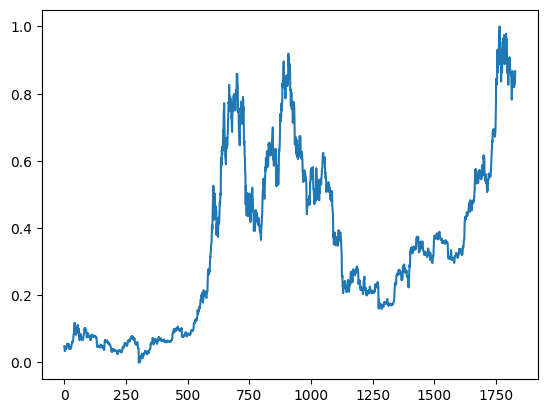

In [ ]:
plt.plot(new_df)

In [ ]:
new_df.shape

(1828, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
##splitting dataset into train and test split
training_size=int(len(new_df)*0.70)
test_size=len(new_df)-training_size
train_data, test_data=new_df[0:training_size,:],new_df[training_size: len(new_df),:1]

In [ ]:
len(test_data)


549

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.33, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1279, 549]

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
     dataX, dataY = [], []
     for i in range(len(dataset)-time_step-1):
         a = dataset[i:(i+time_step), 0]
         dataX.append(a)
         dataY.append(dataset [i + time_step, 0])
     return np.array(dataX), np.array(dataY)

In [ ]:
time_stamp = 100
X_train, Y_train = create_dataset(train_data, time_stamp)
X_test, Y_test = create_dataset(test_data, time_stamp)

In [ ]:
X_train.shape, Y_train.shape

((1178, 100), (1178,))

In [ ]:
X_test.shape, Y_test.shape

((448, 100), (448,))

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [ ]:
# import tensorflow as tf
# from tensorflow import keras

In [ ]:
import keras

In [ ]:
pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
import keras
print(keras.__version__)

3.3.3


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, activation = 'relu', input_shape=(100,1)))
model.add(LSTM(units = 50, return_sequences=True, activation = 'relu',))
model.add(LSTM(units = 50, activation = 'relu',))
model.add(Dense(units = 1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
pip show keras

Name: keras
Version: 3.3.3
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, rich
Required-by: tensorflow


In [ ]:
print(train_predict)


[[10438.757]
 [10391.757]
 [10330.256]
 ...
 [18396.209]
 [17417.88 ]
 [16917.322]]


In [ ]:
model.export("saved_model.keras")

Saved artifact at 'saved_model.keras'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 1), dtype=tf.float32, name='lstm_9_input')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134971416664672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134971511684288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134971511874032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134971514147008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134971513665696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134971512829232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134971512820080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134971416836256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134971513661296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134971513663760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134971416660976: T

In [ ]:
model.save("model.keras")

In [ ]:
model.save("mymodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(Y_train, train_predict))

32217.45082864605

In [ ]:
math.sqrt(mean_squared_error(Y_test, test_predict))

40535.562192475794

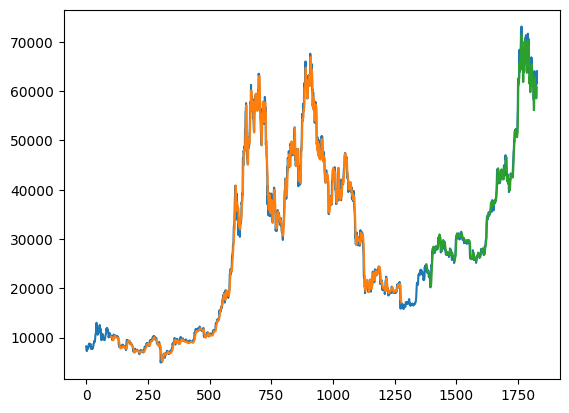

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
train_Predict_Plot = np.empty_like(new_df)
train_Predict_Plot[:, :] = np.nan
train_Predict_Plot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(new_df)
testPredictPlot[:, :] = np.nan
testPredictPlot [len(train_predict)+(look_back*2)+1:len(new_df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(new_df))
plt.plot(train_Predict_Plot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
dataframe = pd.read_csv("/content/BTC-USD.csv", index_col = False)

In [ ]:
len(test_data)

549

In [ ]:
x_input=test_data[449:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.5595707866855028,
 0.5776812207929789,
 0.5921182285462685,
 0.619214973942786,
 0.6283774064383233,
 0.6360505794821435,
 0.6604851474244884,
 0.6573171448015354,
 0.6879172170704475,
 0.6895594857726721,
 0.6928136277789375,
 0.6855138592478037,
 0.6922607757643598,
 0.687219098016547,
 0.6946440038056242,
 0.68810050701221,
 0.6802575212172163,
 0.6718446505371661,
 0.6841647053466049,
 0.6865451232369499,
 0.7274943672858676,
 0.7651227141535717,
 0.8446881552689193,
 0.8255080901490708,
 0.8437462422515517,
 0.8377152805491508,
 0.8544158846806712,
 0.9302173441133674,
 0.8637214622621405,
 0.8975713179529708,
 0.9095908024808175,
 0.9297721950046625,
 0.9326907260308679,
 0.9403384357661329,
 0.9859116789944937,
 0.9764770643837677,
 1.0,
 0.9752336061419797,
 0.9459759205205913,
 0.8859481204946227,
 0.9311013338314105,
 0.918739012227432,
 0.8359964498828896,
 0.9240989239787208,
 0.8885360872932809,
 0.8633920450451557,
 0.8675534034470628,
 0.9141228126052969,
 0.954124752

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.8340039]
101
1 day input [0.57768122 0.59211823 0.61921497 0.62837741 0.63605058 0.66048515
 0.65731714 0.68791722 0.68955949 0.69281363 0.68551386 0.69226078
 0.6872191  0.694644   0.68810051 0.68025752 0.67184465 0.68416471
 0.68654512 0.72749437 0.76512271 0.84468816 0.82550809 0.84374624
 0.83771528 0.85441588 0.93021734 0.86372146 0.89757132 0.9095908
 0.9297722  0.93269073 0.94033844 0.98591168 0.97647706 1.
 0.97523361 0.94597592 0.88594812 0.93110133 0.91873901 0.83599645
 0.92409892 0.88853609 0.86339205 0.8675534  0.91412281 0.95412475
 0.95455086 0.94673305 0.96566651 0.953156   0.94952197 0.97430947
 0.95035653 0.88788396 0.89572156 0.93283697 0.92298267 0.93852263
 0.94537077 0.97868033 0.94208887 0.96336048 0.95561929 0.91356044
 0.86401911 0.89216736 0.85821605 0.86387803 0.82665778 0.85948664
 0.86434354 0.8812401  0.88024474 0.90830169 0.90198266 0.87070546
 0.87371237 0.86304789 0.85811225 0.85362102 0.86430758 0.817264
 0.78228017 0.79504463 0.85034124 0.86504682 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(lst_output)

30

In [ ]:
print(df1)

0        8205.167969
1        7884.909180
2        7343.895508
3        7271.208008
4        8197.689453
            ...     
1823    60793.710938
1824    61448.394531
1825    62901.449219
1826    61552.789063
1827    64016.308594
Name: Close, Length: 1828, dtype: float64


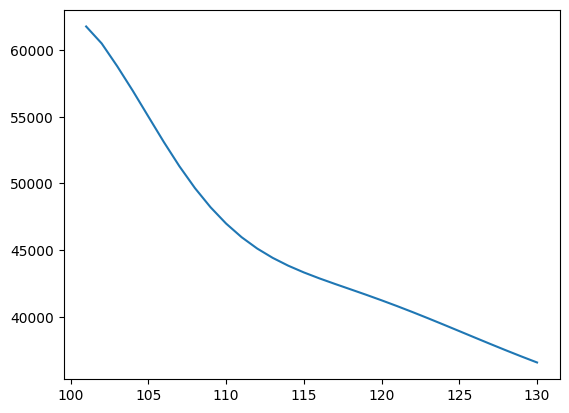

In [ ]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))